# Other beasts: gas, KERMA, damage

Please indicate your name below, since you will need to submit this notebook.

Don't forget to save your progress during the datalab to avoid any loss due to crashes.

In [ ]:
name=''

In the quest of solving the neutron transport equation or any of its approximations for reactor physics problems, our main focus is typically around the neutrons. Consider for example the absorption cross section appearing in the neutron diffusion equation: seemingly we do not care how the neutron is removed from the system, and only care about the fact that it is removed. Samegoes to neutron producing reactions, such as fission, while solving the transport equation we just want to know how many neutrons appear, and for depletion calculations on longer time scales we are intersted in the creation of neutron poisons and the loss of the available fissile material.  

However, in some applications we are very much interested in the underdog of neutron induced reactions,

- the recoiling target nuclei in scattering reactions, and their life after the collision (eg. whether they have enough kinetic energy to bump into other atoms, and kick them from their place thereby inducing damage to the material) 
- the appearance of gaseous product (which can cause swelling or embrittlement)
- and the heat deposited in the aftermath of nuclear reactions

Cross sections or cross section like quantities can be deduced from other cross section data describing these events, and then such cross sections can be used to for example define tallies in neutron transport code to convert the neutron fluence into information on heat deposition, damage, and gas production, which might be important input for experts in other disciplines, such as thermal hydraulics, and stress specialists or material scientists.

We will not carry out much programming in this notebook, it serves rather as an introduction to nuclear data relevant for neutronics practitioners besides the already discussed cross section data.

### Gas production



In [28]:
import json
import numpy as np
import matplotlib.pyplot as plt

#Load json file
file='data/B10alphaproduction.json'
#file='data/C12alphaproduction.json'
with  open (file) as json_file:
    gasJSON = json.load(json_file)


In [29]:
gasDict={}
%matplotlib auto
for func in gasJSON['funcs']:
    gasDict[func['fName']]=[[],[]]
    for xy in func['pts']:
        if xy['x']<=20.0:
            gasDict[func['fName']][0].append(xy['x'])
            gasDict[func['fName']][1].append(xy['y'])

plt.figure()
for reac in gasDict:
    plt.loglog(gasDict[reac][0],gasDict[reac][1],label=reac)
plt.legend()
plt.xlabel('energy (MeV)')
plt.ylabel('cross section (barns)')
plt.show()

Using matplotlib backend: Qt5Agg


ValueError: x and y must have same first dimension, but have shapes (450,) and (436,)

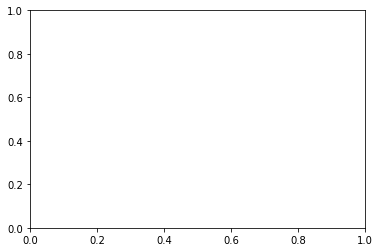

In [21]:
plt.plot(np.array(gasDict['ENDF/B-VI: B-10(N,A)LI-7'][0]), np.array(gasDict['ENDF/B-VI: B-10(N,T+2A)'][0]))

To be uploaded.

The notebook covers cross sections describing

-  KERMA (kinetic energy release in materials)
-  Gas production
-  Damage energy